### BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

기존방식과의 차이점
- 정규 표현식, 문자열 함수 등을 활용하여 홈페이지 텍스트 내 패턴을 분석하여 하나씩 원하는 데이터를 찾아가는 형식
- BS는 HTML 문서를 태그를 기반으로 구조화하여 태그로 원하는 데이터를 찾아가는 형식


In [211]:
html_doc = """
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [212]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

soup = BeautifulSoup(html,'html.parser')
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling  # next_sibling 두개인 이유? 공백이 </p> 다음 ㅎ나ㅏ 있음 공백 고려해서 두개씩

print(h1.string)
print(p1.string)
print(p2.string)

스크레이핑이란?
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


### find() : HTML의 해당 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴


### find_all() : 
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능
- CSS 속성으로 필터링(class_로 클래스를 직접 사용 혹은 attrs에서 속성 = 값으로 필터링)


In [213]:
html = """
<html><body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

soup = BeautifulSoup(html, 'html.parser')
title = soup.find(id='title')
body = soup.find(id='body')

print(title.string)
print(body.string)
print(title.text)
print(body.text)
print(body.get_text())

스크레이핑이란?
웹 페이지를 분석하는 것
스크레이핑이란?
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [214]:
#texts = soup.findAll('p')
texts = soup.find_all('p')
for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [215]:
# urlopen()과 BeautifulSoup의 조합
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import urllib.request as req
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')
title = soup.find('title').string
wf = soup.find('wf').string
print(title,'\n')
print(wf)

기상청 육상 중기예보 

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [216]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
wf = soup.find('wf').string

wf = re.sub('[^0-9가-힣]',' ',wf)
wf

'   강수  30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다           기온  이번 예보기간 아침 기온은 22 26도  낮 기온은 29 34도로 어제 24일  아침최저기온 22 24도  낮최고기온 25 32도 보다 높겠습니다          주말전망  30일 토 은 전라권에 소나기가 오는 곳이 있겠고  31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다                      아침 기온은 23 25도  낮 기온은 31 34도가 되겠습니다               이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며  돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며  앞으로 발표되는 기상정보를 참고하기 바랍니다 '

#### 과제 0722_2
wf를 다시 정렬하여 불필요한 부분을 제거해서 아래와 같은 형식으로 출력하세요.

'(강수) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다. 27일(수)은 수도권과 강원영서에 비가 오겠습니다.(기온) 이번 예보기간 아침 기온은 22~26도로 어제(19일, 아침최저기온 20~24도)보다 조금 높겠고, 낮 기온은 28~34도로 어제(낮최고기온 27~34도)와 비슷하겠습니다.(주말전망) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다.


In [217]:
a = re.sub(' +',' ',wf)
a

' 강수 30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다 기온 이번 예보기간 아침 기온은 22 26도 낮 기온은 29 34도로 어제 24일 아침최저기온 22 24도 낮최고기온 25 32도 보다 높겠습니다 주말전망 30일 토 은 전라권에 소나기가 오는 곳이 있겠고 31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다 아침 기온은 23 25도 낮 기온은 31 34도가 되겠습니다 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며 돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며 앞으로 발표되는 기상정보를 참고하기 바랍니다 '

In [218]:
texts = soup.find_all('wf')
for t in texts:
    t = t.text
    t = re.sub('[^0-9가-힣]',' ',t)
    print(t, '\n')

   강수  30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다           기온  이번 예보기간 아침 기온은 22 26도  낮 기온은 29 34도로 어제 24일  아침최저기온 22 24도  낮최고기온 25 32도 보다 높겠습니다          주말전망  30일 토 은 전라권에 소나기가 오는 곳이 있겠고  31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다                      아침 기온은 23 25도  낮 기온은 31 34도가 되겠습니다               이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며  돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며  앞으로 발표되는 기상정보를 참고하기 바랍니다  

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

구름많음 

흐림 

흐림 

흐림 

흐림 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

구름많음 

흐림 

흐림 

흐림 

흐림 

구름많음

In [219]:
req = requests.get('https://naver.com')
html = req.text
#print(html)

# blind / fix / attrs 차이

soup = BeautifulSoup(html,'html.parser')
#result = soup.find_all('span',class_='blind')[0]  #< [1] 인덱스
#result = soup.find_all('span',class_='fix')
result = soup.find_all('span',attrs={'class':'fix'})
#result = soup.find_all('span')

result

[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [220]:
import re

req = requests.get('https://naver.com')
soup = BeautifulSoup(html,'html.parser')
print(soup.find_all(string='네이버'))
print(soup.find_all(string=re.compile('네이버')))

['네이버']
['네이버', '네이버를 시작페이지로', '쥬니어네이버', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


### select_one(), select()
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 ., id는 #로 표시


In [221]:
import urllib.request as req

url = "https://finance.naver.com/marketindex/"
res = req.urlopen(url)
soup = BeautifulSoup(res,'html.parser')
price = soup.select_one('div.head_info > span.value').string
print('usd/krw =', price)

usd/krw = 1,313.00


In [222]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""


In [3]:
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable


In [224]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(html_doc, 'html.parser') # 파싱 방법 : parser, lxml 

print(bs.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <div>
  </div>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [225]:
bs.title

<title>The Dormouse's story</title>

In [226]:
bs.title.name

'title'

In [227]:
bs.title.parent.name

'head'

In [228]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [229]:
bs.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [230]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [231]:
bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [232]:
bs.a['class']

['sister']

In [233]:
for link in bs.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [234]:
bs.find_all()

[<html><head><title>The Dormouse's story</title></head>
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body></html>,
 <head><title>The Dormouse's story</title></head>,
 <title>The Dormouse's story</title>,
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;

In [235]:
bs.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

### string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용

In [236]:
print(bs.string)

None


In [237]:
print(bs.get_text())

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [238]:
print(bs.find('div'))

<div></div>


In [239]:
print(bs.find('div').string) # 스트링은 none 이라도 반환해주는데

None


In [240]:
print(bs.find('div').get_text())  # 아무것도 없으면 진짜 아무것도 안나옴

In [241]:
print(bs.find('body').string)

None


In [242]:
print(bs.find('body').get_text())  # get_text() << 형식 기억



The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [243]:
bs.find('body').get_text() # 프린트 안쓰면 \n까지 다나옴!

"\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n"

In [244]:
bs.a.string  # 스트링은 해당되는 것만 뿁 나옴

'Elsie'

In [245]:
li = bs.find_all('p')
for i in li:
    print(i.string)

The Dormouse's story
None
...


In [246]:
li = bs.find_all('p')
for i in li:
    print(i.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


### urllib + bs

In [247]:
import urllib.request as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
text = bs.find('p')
text = text.get_text()
text

'AiRS추천으로 구성된 뉴스를 제공합니다.'

In [248]:
bs.find('div')

<div id="wrap">
<!-- 광고적용 태그 추가 -->
<div id="da_base"></div>
<div id="da_stake"></div>
<div class="header" id="header">
<div id="u_skip">
<a href="#lnb" tabindex="1"><span>메인 메뉴로 바로가기</span></a>
<a href="#main_content" tabindex="2"><span>본문으로 바로가기</span></a>
</div>
<div class="snb_area">
<div class="snb_inner">
<div class="gnb_area">
<div class="gnb_wrap">
<div class="gnb_dark_type2" id="gnb"></div>
</div>
<div class="gnb_search is_hidden _search_content">
</div>
<div class="gnb_tool" id="gnb_search_tool">
<a class="tool_button _search_content_toggle_btn nclicks(gnb.sch)" href="javascript:;"><span class="icon_search">검색</span></a>
</div>
</div>
<div id="snb_wrap">
<h1>
<a class="h_logo nclicks(gnb.naver)" href="https://www.naver.com/"><span class="blind">NAVER</span></a>
<a class="h_news nclicks(gnb.news)" href="/"><span class="blind">뉴스</span></a>
</h1>
<ul class="snb_related_service">
<li><span class="snb_bdr"></span><a class="entertain nclicks(gnb.enter)" href="https://entertain.nav

In [249]:
bs.find('div').find('a').string

'메인 메뉴로 바로가기'

In [250]:
items= bs.find('div').find_all('a')
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 


안내헤드라인 뉴스



민주 “권오수 아들 왜 취임식왔나”…대통령실 “확인 어려워”
野 "권오수 아들 왜 취임식에‥경제공동체?" 대통령실 "확인 어려워"
野 "주가조작 회장 아들 尹 취임식 참석...이유 밝혀야"
도이치모터스, 올 상반기 영업익 395억…전년比 28% ↑
16개의 관련뉴스 더보기
尹 "행안부·경찰청서 필요한 조치"...대통령실 "제복 집단행동 우려"
尹, 총경 집단행동에 "행안부·경찰청서 필요한 조치 할 것"
윤 대통령, 경찰 집단행동 예고에 “행안부·경찰청에서 잘할 것”
尹, 경찰 반발 확산에 "행안부·경찰청서 필요조치 잘 할 것"
51개의 관련뉴스 더보기



국민적 관심 '尹 도어스테핑'…발달 장애인 그림 채운 대통령실
尹 대통령 "그 작가네?" 출근길, 미술계 '우영우' 장애인 작품 걸었다
尹 출근길에 그림 15점…발달장애 아티스트 작품 걸렸다
尹 “같은 작가네”…용산 청사에 장애인 미술 작품 15점 걸렸다
30개의 관련뉴스 더보기



국회, 남래진 선관위원 후보자 청문보고서 채택
남래진 "사적채용 논란 우모씨 부친, 강릉 선관위원 자진사퇴해야"
국회, 남래진 선관위원 후보자 인사청문 보고서 채택
남래진, '아들 사적채용 논란' 강릉 선관위원에 "자진사퇴가 맞아"
25개의 관련뉴스 더보기



나경원 "이준석, 자숙해야…나라면 그랬을 것"



 나경원 "이준석, 내부적 갈등 요소 부추겨...자숙하는 모습 보여야"[뉴스킹]
13개의 관련뉴스 더보기



홍준표 "경찰, 아무리 허약한 정부라지만 간 큰 조직 돼간다"



홍준표 경찰서장회의에 "경찰 편 들었는데...간 큰 조직 돼간다"
12개의 관

#### 과제 0725_1
상기 출력물을 불필요한 공백없이 정렬하여 출력하세요.

In [4]:
from bs4 import BeautifulSoup
import urllib.request as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
text = bs.find('div').find_all('a')  # div 안에 a 태그까지

li = []
for i in bs:
    li.append(i.get_text())
print(li)

['', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n정치 홈 : 네이버 뉴스\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n메인 메뉴로 바로가기\n본문으로 바로가기\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\nNAVER\n뉴스\n\n\nTV연예\n스포츠\n날씨\n프리미엄\n\n\n\n\n\n\n\n\n\n\n언론사별 \n정치 선택됨\n경제 \n사회 \n생활/문화 \nIT/과학 \n세계 \n랭킹 \n신문보기 \n오피니언 \nTV \n팩트체크 \n\n\n\n\n\n\n\n전체 언론사\n뉴스스탠드\n라이브러리\n\n\n\n\n\n\n\n\n07.26(화)\n\n전체 언론사\n뉴스스탠드\n라이브러리\n\n\n\n\n\n기사목록\n\n\n\n\n\n\n\n\n정치\n\n대통령실 \n국회/정당 \n북한 \n행정 \n국방/외교 \n정치일반 \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n안내헤드라인 뉴스\n\n\n                            헤드라인 뉴스와 각 기사묶음 타이틀은  기사 내용을 기반으로 자동 추출됩니다.\n                        \n\n닫기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n유시민 "尹·한동훈 매일 화난 얼굴, 칼 휘두르는 사람들이…"\n유시민 전 노무현재단 이사장은 25일 윤석열 정부에 대해 “이 정부는 제가 보기에 무신정권 같다”며 “칼 휘두르는 사람들이 정서적으로 거칠다”고 말했다. …\n\n중앙일보\n\n\n\n\n\n\n부산일보\n\n유시민 "여당은 \'도파민\' 중독 상태…윤 정부는 \'무신정권\' 같아"\n\n\n\n\n\n매일신문\n\n유시민 "與 정치인 도파민 중독…마약 중독과 비슷한 상태"\n\n\n\n\n\n이데일리\n\n유시민 "여당 도파민 중독상태, 7급 줘야 되는데 9급 주니 기분 나쁜 것"\n\n\n\n\n\n\n17개의 관련뉴스 더보기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n윤석열 정

In [8]:
import re
a = ' '.join(li)
a = re.sub('\W',' ',a)
re.sub()

'                    정치 홈   네이버 뉴스                  메인 메뉴로 바로가기 본문으로 바로가기           검색     NAVER 뉴스   TV연예 스포츠 날씨 프리미엄           언론사별  정치 선택됨 경제  사회  생활 문화  IT 과학  세계  랭킹  신문보기  오피니언  TV  팩트체크         전체 언론사 뉴스스탠드 라이브러리         07 26 화   전체 언론사 뉴스스탠드 라이브러리      기사목록         정치  대통령실  국회 정당  북한  행정  국방 외교  정치일반                안내헤드라인 뉴스                               헤드라인 뉴스와 각 기사묶음 타이틀은  기사 내용을 기반으로 자동 추출됩니다                            닫기                  유시민  尹 한동훈 매일 화난 얼굴  칼 휘두르는 사람들이   유시민 전 노무현재단 이사장은 25일 윤석열 정부에 대해  이 정부는 제가 보기에 무신정권 같다 며  칼 휘두르는 사람들이 정서적으로 거칠다 고 말했다     중앙일보       부산일보  유시민  여당은  도파민  중독 상태 윤 정부는  무신정권  같아       매일신문  유시민  與 정치인 도파민 중독 마약 중독과 비슷한 상태       이데일리  유시민  여당 도파민 중독상태  7급 줘야 되는데 9급 주니 기분 나쁜 것        17개의 관련뉴스 더보기                윤석열 정부 첫 대정부질문   야당은 경찰국 신설  여당은 문재인 정부 강제 북송 난타 국회에서 25일 윤석열 정부 출범 후 첫 대정부질문이 열렸다  더불어민주당은 행정안전부 내 경찰국 신설과 대통령실 사적 채용 논란을 두고 정부에 맹공을     경향신문       뉴시스  여야  서로 약점  파고 들기  여  북송  vs 야  사적 채용       연합뉴스  대정부질문 첫날 경찰국 檢인사 어민북송  사적채용 

In [3]:
from bs4 import BeautifulSoup
import urllib.request as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
text = bs.find('div')
text = text.get_text()
text

'\n\n\n\n\n\n메인 메뉴로 바로가기\n본문으로 바로가기\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\nNAVER\n뉴스\n\n\nTV연예\n스포츠\n날씨\n프리미엄\n\n\n\n\n\n\n\n\n\n\n언론사별 \n정치 선택됨\n경제 \n사회 \n생활/문화 \nIT/과학 \n세계 \n랭킹 \n신문보기 \n오피니언 \nTV \n팩트체크 \n\n\n\n\n\n\n\n전체 언론사\n뉴스스탠드\n라이브러리\n\n\n\n\n\n\n\n\n07.26(화)\n\n전체 언론사\n뉴스스탠드\n라이브러리\n\n\n\n\n\n기사목록\n\n\n\n\n\n\n\n\n정치\n\n대통령실 \n국회/정당 \n북한 \n행정 \n국방/외교 \n정치일반 \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n안내헤드라인 뉴스\n\n\n                            헤드라인 뉴스와 각 기사묶음 타이틀은  기사 내용을 기반으로 자동 추출됩니다.\n                        \n\n닫기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n北, 신규 발열 환자 50명대 주장…"99.99% 완쾌해"\n북한이 신종 코로나바이러스 감염증(코로나19)으로 의심되는 신규 발열 환자 수가 처음으로 50명대로 집계됐다고 발표했다. 광복지구상업중심과 평천구역식료품 …\n\n이데일리\n\n\n\n\n\n\n연합뉴스\n\n북, 발열자 첫 50명대로 줄어…"누적발열자 중 99.99% 완쾌"\n\n\n\n\n\n이데일리\n\n北, 신규 발열 환자 30명대 주장…변이 바이러스 우려도\n\n\n\n\n\nKBS\n\n북 “신규 발열 30명대” 주장…코로나 변이·원숭이두창 경계\n\n\n\n\n\n\n14개의 관련뉴스 더보기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n한동훈 “의원님도 장관 때 총장 패싱” vs 박범계 “택도 없는 소리”\n전현직 법무부 장관인 박범계 더불어민주당 의원과 한동훈 현 장관이 25일 새 정부 첫 국회 대정부질문에서 맞붙

In [252]:
text1 = re.sub('[^\w+]',' ',text)
text1 = re.sub(' +',' ',text1)
text1

' 메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별 정치 선택됨 경제 사회 생활 문화 IT 과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사 뉴스스탠드 라이브러리 07 25 월 전체 언론사 뉴스스탠드 라이브러리 기사목록 정치 대통령실 국회 정당 북한 행정 국방 외교 정치일반 안내헤드라인 뉴스 헤드라인 뉴스와 각 기사묶음 타이틀은 기사 내용을 기반으로 자동 추출됩니다 닫기 동영상기사 한동훈 vs 박범계 전현직 법무장관의 격돌 속보영상 7월 임시국회 대정부질문 첫날 정치 외교 통일 안보 분야 질의에서 더불어민주당 박범계 의원은 한동훈 법무부 장관을 향해 검찰총장 인선 지연과 법무부 인사 KBS 조선일보 박범계 법무부 인사검증 법치농단 한동훈 그러면 文민정실도 위법 연합뉴스 한동훈 도이치모터스 사건 수사 곧 결론날 것으로 생각 SBS 한동훈 도이치모터스 사건 수사 곧 결론날 것으로 생각 35개의 관련뉴스 더보기 유시민 尹 정부는 무신정권 국민의힘은 도파민 중독 상태 매일 화나 있으니 검찰권 칼 휘둘러 남북관계 공간 열 것을 법의 잣대로 용산이 구중궁궐 靑 유원지 만들어 檢출신 대통령이니 5년 이대로 갈 세계일보 이데일리 유시민 여당 도파민 중독상태 7급 줘야 되는데 9급 주니 기분 나쁜 것 YTN 유시민 尹정부 참 순수 여당은 도파민 중독 상태 뉴스킹 뉴시스 유시민 尹정부는 무신정권 여당은 마약중독 상태 12개의 관련뉴스 더보기 한 인니 정상회담 28일 개최 윤 정부 아세안외교 신호탄 윤석열 대통령은 오는 28일 서울에서 조코 위도도 조코위 인도네시아 대통령과 정상회담을 하고 양국 현안 및 주요 국제 현안에 대한 협의에 나섭니다 김 SBS 매일신문 한 인니 정상회담서 KF 21 분담금 미납 문제 논의할 예정 YTN 안보실 인니 대통령 방한 아세안 외교 신호탄 KBS 한 인니 28일 정상회담 KF 21 분담금 문제 등 논의 27개의 관련뉴스 더보기 속보 안보실 북송 인수인계 없었다 놀라울만큼 자료 없어 국

In [253]:
items = bs.find('div', id='header').find_all('a')
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리


In [254]:
texts = bs.find_all('p')
texts

[<p class="airs_info_inner"><i class="airs_info_icon_airs">AiRS</i><span class="airs_info_text"><b>추천</b>으로 구성된 뉴스를 제공합니다.</span></p>,
 <p class="section_sub_txt">오후 3시~오후 4시까지 집계한 결과입니다.</p>,
 <p class="copyright">본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.</p>]

In [255]:
texts = bs.find_all('p')
for t in texts:
    #print(t.string)
    print(t.get_text())

AiRS추천으로 구성된 뉴스를 제공합니다.
오후 3시~오후 4시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [256]:
import urllib.request as rq
url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
bs

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-sca

In [257]:
bs = bs.text
# bs
p = re.sub('[^가-힣]',' ',bs)
p = re.sub('\s{2,}',' ',p)
p

' 네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 광주방송 월 일 구독 한덕수 지지율 하락은 국민 기대 만족시키지 못한 탓 한덕수 국무총리가 윤석열 대통령의 지지율 하락 원인에 대해 가장 큰 건 새로운 정부에 대한 국민의 높은 기대에 개월의 기간 동안 충분히 만족시키지 못한 것 이라고 말했습니다 한 총리는 오늘 일 국회 대정부 블로터 월 일 구독 공시분석 내셔널지오그래픽의 더네이쳐홀딩스 발행한 까닭은 알아두면 도움이 될 의미있는 공시를 소개 분석 합니다 공시 요약 오늘 소개할 공시는 더네이쳐홀딩스가 지난 일 공시한 주요사항보고서 유상증자결정 입니다 내용은 간단합니다 더네이쳐홀딩스가 운영자금 확보를 위 연합뉴스 월 일 구독 동영상 재생시간 현장연결 권영세 북송 사건 분명히 잘못된 조치라고 생각 통일부장관입니다 장관님 지난 년간 문재인 정부의 대북 정책 어떻게 평가하십니까 권영세 통일부장관 역대 정부 모든 정부가 다 집권하면서 그리고 집권 중에 한반도 평화나 남북관계 개선을 위해서 모두 노력을 디지털데일리 월 일 구독 페북 인스타하려면 개인정보 넘겨 메타 횡포에 이용자 시민단체 분노 페이스북 인스타그램을 운영하는 메타가 다음달 일 개인정보처리방침 및 이용약관을 업데이트한다 이에 따라 페이스북과 인스타그램 이용자는 개인정보 수집 이용 등에 대해 동의하지 않으면 서비스를 이 한경비즈니스 월 일 구독 우영우 읽기 배우 박은빈의 연기 내공 책에서 왔다고 우영우 특집 독서 우영우 를 소화할 배우는 지구상에서 박은빈 밖에 없다 고 했던 문지원 작가의 극찬 배우 박은빈의 캐스팅이 정해지는 순간 만세 를 불렀다 는 유인식 감독의 흥분은 최근 화제작 이상한 변 새로보기 경향신문 월 일 구독 이은주 윤석열 대통령 반성 안 하면 바닥 밑 지하실 경험할 것 이은주 정의당 비상대책위원

In [258]:
import urllib.request as rq
import re    

url = 'https://news.naver.com'
html = rq.urlopen(url)  # 여기는 urlopen(url)
bs = BeautifulSoup(html,'lxml')

# 와우.. join 쓰면 단어 하나하나가 연결됨

#bs = str(bs)  요고 보다는 get_text()가 좋음!
text = bs.get_text()
news = re.findall('[가-힣]+', text)
news = ' '.join(news)
news

'네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 파이낸셜뉴스 월 일 구독 김연아 살 연하 고우림과 결혼 년 열애 피겨 여왕 김연아 와 팝페라 가수 고우림 이 결혼한다 일 두 사람의 열애 소식과 함께 고우림 소속사 비트인터렉티브는 이날 공식입장을 내고 고우림은 오는 월 피겨여왕 김연아와 결혼식을 올린 매일경제 월 일 구독 갑자기 달려들었다 경기 중 세 소년 손가락 부러뜨린 체스 로봇 체스 로봇이 지난주 열린 국제체스대회에서 대국 도중 상대 선수인 소년을 공격해 손가락을 부러뜨렸다 일 현지시간 는 지난 일 러시아 모스크바 국제체스포럼에서 진행된 인간 대 로봇 체스 경기에 참가한 기자협회보 월 일 구독 과방위로 쏠린 눈 공영방송법 처리할까 일 막이 오른 후반기 국회에서 공영방송 지배구조 개선안을 최우선적으로 처리해야 한다는 언론계의 요구가 커지고 있다 지난 월 말 더불어민주당이 당론으로 관련 법안 처리를 약속한 이후 일정이 계속 지연되고 있어서 월 일 구독 동영상 재생시간 고물가에 지갑 못 열어 유행하는 무지출 챌린지 기자도 해봤다 출근은 공공자전거 따릉이로 점심은 냉장고에 남은 재료들로 도시락 싸기 커피는 집에 굴러다니는 쿠폰으로 해결 간식은 회사 탕비실에서 외식물가가 일 년 만에 넘게 오르면서 젊은 직장인들이 하루에 한 푼도 경향신문 월 일 구독 이은주 윤석열 대통령 반성 안 하면 바닥 밑 지하실 경험할 것 이은주 정의당 비상대책위원장 겸 원내대표는 일 윤석열 정부는 대북문제로 다시 꺼내든 적폐청산의 칼을 도로 집어넣으라 고 말했다 이 원내대표는 윤석열 대통령을 향해 직접 인사실패에 대해 사과하고 쇄신방안을 발 새로보기 전자신문 월 일 구독 현대차 세대 그랜저 출시도 안 했는데 만명 대기 현대차가 올해 분기 그랜저 완전변경 모델인 세대 그랜저 를 출시할 계획인

In [259]:
texts = bs.find_all('p')
for t in texts:
    #print(t.string, '\n') #string으로 하니까 None 나옴
    print(t.get_text(), '\n')

'피겨 여왕' 김연아(32)와 팝페라 가수 고우림(27)이 결혼한다. 25일 두 사람의 열애 소식과 함께 고우림 소속사 비트인터렉티브는 이날 공식입장을 내고 "고우림은 오는 10월 '피겨여왕' 김연아와 결혼식을 올린 

체스 로봇이 지난주 열린 국제체스대회에서 대국 도중 상대 선수인 소년을 공격해 손가락을 부러뜨렸다. 24일(현지시간) BBC는 지난 19일 러시아 모스크바 국제체스포럼에서 진행된 인간 대 로봇 체스 경기에 참가한 7 

25일 막이 오른 후반기 국회에서 공영방송 지배구조 개선안을 최우선적으로 처리해야 한다는 언론계의 요구가 커지고 있다. 지난 4월 말 더불어민주당이 당론으로 관련 법안 처리를 약속한 이후 일정이 계속 지연되고 있어서 

출근은 공공자전거 따릉이로, 점심은 냉장고에 남은 재료들로 도시락 싸기, 커피는 집에 굴러다니는 쿠폰으로 해결, 간식은 회사 탕비실에서…. 외식물가가 일 년 만에 8% 넘게 오르면서 젊은 직장인들이 하루에 한 푼도  

이은주 정의당 비상대책위원장 겸 원내대표는 25일 “윤석열 정부는 대북문제로 다시 꺼내든 적폐청산의 칼을 도로 집어넣으라”고 말했다. 이 원내대표는 윤석열 대통령을 향해 “직접 인사실패에 대해 사과하고 쇄신방안을 발 

현대차가 올해 4분기 그랜저 완전변경 모델인 '7세대 그랜저'를 출시할 계획인 가운데 구매 의사를 밝힌 소비자가 3만명을 넘은 것으로 전해졌다. 25일 현대차에 따르면 현재 판매 중인 6세대 그랜저의 계약 후 출고  

자동으로 접히는 기능이 있는 이른바 '오토 폴딩 유모차'에 아기 손가락이 끼여 절단 사고가 발생했다는 소식이 알려지면서 유모차 업계에 비상이 걸린 가운데, 관련 업체들이 잇달아 공지글을 올리며 해당 사고가 자신들과는 

금융위원회는 25일 제3차 임시회의를 열고 이명순 금융위원회 증권선물위원회 상임위원과 이준수·함용일 금감원 부원장보를 금감원 부원장에 임명했다고 밝혔다. 금감원 부원장은 금감원장이 제청한 뒤 금융위원회가 임명한다.  

고물가와 고금리에 생활비 부담

### requests+ bs

In [260]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com'

r = rq.get(url) # 여기는 get(url)
html = r.text # 꼭 text로 뽑아줘야함 requests는
bs = BeautifulSoup(html, 'lxml')
bs

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-sca

In [261]:
text = bs.find('p').get_text()
text

"알아두면 도움이 될 의미있는 공시를 소개·분석 합니다. 공시 요약 오늘 소개할 공시는 더네이쳐홀딩스가 지난 22일 공시한 '주요사항보고서(유상증자결정)'입니다. 내용은 간단합니다. 더네이쳐홀딩스가 운영자금 확보를 위"

#### 과제 0725_2

기상청 육상 정보에서 강원도의 지역 번호는 105이다. 강원도의 날씨 예보를 불필요한 공백을 제거한 후 출력하세요.

In [11]:
from bs4 import BeautifulSoup
import requests as rq
import re
                            # 대박적.. 오픈 api 찾아서 쓰는거여씀..ㅠ
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=105'

html = rq.get(url).text
bs = BeautifulSoup(html,'lxml')
wf = bs.find('wf').get_text()
wf = re.sub('[^가-힣0-9()~.,m]',' ',wf)
re.sub('\s{2,}','',wf)

C:\Users\admin\anaconda3\envs\cakd7\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


'(하늘상태) 이번 예보기간에는 흐린 날이 많겠습니다.(기온) 이번 예보기간 아침 기온은 19~26도, 낮 기온은 26~33도로 어제(25일, 아침최저기온 19~23도, 낮최고기온 25~34도)와 비슷하겠습니다.(해상) 동해중부해상의 물결은 0.5~2.0m로 일겠습니다.(주말전망) 30일(토)~31일(일)은 가끔 구름많겠습니다. 아침 기온은 19~25도, 낮 기온은 27~33도가 되겠습니다.이번 예보기간 동안 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

In [24]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
r = rq.get(url)
bs = BeautifulSoup(r.text,'lxml')
bs

<?xml version="1.0" encoding="utf-8" ?><html><body><rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2022년 07월 25일 (월)요일 18:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2022년 07월 25일 (월)요일 18:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
<header>
<title>전국 육상중기예보</title>
<tm>202207251800</tm>
<wf>&lt;![CDATA[○ (강수) 30일(토)은 전라권에, 8월 1일(월)은 제주도에 소나기가 오는 곳이 있겠습니다. <br/>○ (기온) 이번 예보기간 아침 기온은 23~26도, 낮 기온은 30~34도로 오늘(25일, 아침최저기온 22~26도, 낮최고기온 29~36도)과 비슷하겠습니다.<br/>○ (주말전망) 30일(토)은 가끔 구름많고 전라권에는 소나기가 오는 곳이 있겠고, 31일(일)은 가끔 구름많겠습니다. <br/>              아침 기온은 24~26도, 낮 기온은 31~34도가 되겠습니다.<br/><br/>* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳

In [3]:
bs.title.get_text()

'기상청 육상 중기예보'

In [26]:
weathers = bs.find_all('province')
for i in weathers:
    print(i.get_text())

서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
강원도영서
강원도영서
강원도영동
대전ㆍ세종ㆍ충청남도
대전ㆍ세종ㆍ충청남도
대전ㆍ세종ㆍ충청남도
충청북도
충청북도
충청북도
광주ㆍ전라남도
광주ㆍ전라남도
광주ㆍ전라남도
광주ㆍ전라남도
광주ㆍ전라남도
광주ㆍ전라남도
전라북도
전라북도
전라북도
전라북도
전라북도
전라북도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
대구ㆍ경상북도
대구ㆍ경상북도
대구ㆍ경상북도
대구ㆍ경상북도
대구ㆍ경상북도
대구ㆍ경상북도
제주도
제주도


In [44]:
weathers = bs.find_all('location')
for i in weathers:
    print(i.get_text())


서울ㆍ인천ㆍ경기도
서울

A02
2022-07-28 00:00
맑음
25
32

20


A02
2022-07-28 12:00
맑음
25
32

20


A02
2022-07-29 00:00
맑음
25
33

20


A02
2022-07-29 12:00
구름많음
25
33

40


A02
2022-07-30 00:00
구름많음
25
33

40


A02
2022-07-30 12:00
구름많음
25
33

40


A02
2022-07-31 00:00
맑음
26
34

20


A02
2022-07-31 12:00
맑음
26
34

20


A02
2022-08-01 00:00
맑음
26
34

20


A02
2022-08-01 12:00
흐림
26
34

40


A01
2022-08-02 00:00
흐림
26
34

40


A01
2022-08-03 00:00
흐림
25
33

40


A01
2022-08-04 00:00
흐림
25
33

40



서울ㆍ인천ㆍ경기도
인천

A02
2022-07-28 00:00
맑음
24
30

20


A02
2022-07-28 12:00
맑음
24
30

20


A02
2022-07-29 00:00
맑음
25
31

20


A02
2022-07-29 12:00
구름많음
25
31

40


A02
2022-07-30 00:00
구름많음
25
31

40


A02
2022-07-30 12:00
구름많음
25
31

40


A02
2022-07-31 00:00
맑음
25
32

20


A02
2022-07-31 12:00
맑음
25
32

20


A02
2022-08-01 00:00
맑음
26
32

20


A02
2022-08-01 12:00
흐림
26
32

40


A01
2022-08-02 00:00
흐림
25
31

40


A01
2022-08-03 00:00
흐림
25
31

40


A01
2022-08-04 00:00
흐림
25
31

40



서울ㆍ인천ㆍ경기도
수원

A02
202

In [46]:
weat = weathers[6:9]
weat

[<location wl_ver="3">
 <province>강원도영서</province>
 <city>춘천</city>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-28 00:00</tmef>
 <wf>맑음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>0</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-28 12:00</tmef>
 <wf>맑음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>20</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-29 00:00</tmef>
 <wf>구름많음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>30</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-29 12:00</tmef>
 <wf>구름많음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>40</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-30 00:00</tmef>
 <wf>구름많음</wf>
 <tmn>24</tmn>
 <tmx>33</tmx>
 <reliability></reliability>
 <rnst>40</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-30 12:00</tmef>
 <wf>구름많음</wf>
 <tmn>24</tmn>
 <tmx>33</tmx>
 <reliability></reliability>
 <rnst>40</rnst>
 </d

In [45]:
weathers = bs.find_all('location')
li = []
for i in weathers:
    li.append(i.get_text())
print(li)

['\n서울ㆍ인천ㆍ경기도\n서울\n\nA02\n2022-07-28 00:00\n맑음\n25\n32\n\n20\n\n\nA02\n2022-07-28 12:00\n맑음\n25\n32\n\n20\n\n\nA02\n2022-07-29 00:00\n맑음\n25\n33\n\n20\n\n\nA02\n2022-07-29 12:00\n구름많음\n25\n33\n\n40\n\n\nA02\n2022-07-30 00:00\n구름많음\n25\n33\n\n40\n\n\nA02\n2022-07-30 12:00\n구름많음\n25\n33\n\n40\n\n\nA02\n2022-07-31 00:00\n맑음\n26\n34\n\n20\n\n\nA02\n2022-07-31 12:00\n맑음\n26\n34\n\n20\n\n\nA02\n2022-08-01 00:00\n맑음\n26\n34\n\n20\n\n\nA02\n2022-08-01 12:00\n흐림\n26\n34\n\n40\n\n\nA01\n2022-08-02 00:00\n흐림\n26\n34\n\n40\n\n\nA01\n2022-08-03 00:00\n흐림\n25\n33\n\n40\n\n\nA01\n2022-08-04 00:00\n흐림\n25\n33\n\n40\n\n', '\n서울ㆍ인천ㆍ경기도\n인천\n\nA02\n2022-07-28 00:00\n맑음\n24\n30\n\n20\n\n\nA02\n2022-07-28 12:00\n맑음\n24\n30\n\n20\n\n\nA02\n2022-07-29 00:00\n맑음\n25\n31\n\n20\n\n\nA02\n2022-07-29 12:00\n구름많음\n25\n31\n\n40\n\n\nA02\n2022-07-30 00:00\n구름많음\n25\n31\n\n40\n\n\nA02\n2022-07-30 12:00\n구름많음\n25\n31\n\n40\n\n\nA02\n2022-07-31 00:00\n맑음\n25\n32\n\n20\n\n\nA02\n2022-07-31 12:00\n맑음\n25\n32\n\n20\n\n\nA

In [64]:
weathers2 = li[6:9]
weathers2

['\n강원도영서\n춘천\n\nA02\n2022-07-28 00:00\n맑음\n23\n32\n\n0\n\n\nA02\n2022-07-28 12:00\n맑음\n23\n32\n\n20\n\n\nA02\n2022-07-29 00:00\n구름많음\n23\n32\n\n30\n\n\nA02\n2022-07-29 12:00\n구름많음\n23\n32\n\n40\n\n\nA02\n2022-07-30 00:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-07-30 12:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-07-31 00:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-07-31 12:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-08-01 00:00\n구름많음\n25\n32\n\n30\n\n\nA02\n2022-08-01 12:00\n흐림\n25\n32\n\n40\n\n\nA01\n2022-08-02 00:00\n흐림\n25\n33\n\n40\n\n\nA01\n2022-08-03 00:00\n흐림\n24\n32\n\n40\n\n\nA01\n2022-08-04 00:00\n흐림\n24\n33\n\n40\n\n',
 '\n강원도영서\n원주\n\nA02\n2022-07-28 00:00\n맑음\n23\n32\n\n0\n\n\nA02\n2022-07-28 12:00\n맑음\n23\n32\n\n20\n\n\nA02\n2022-07-29 00:00\n구름많음\n23\n32\n\n30\n\n\nA02\n2022-07-29 12:00\n구름많음\n23\n32\n\n40\n\n\nA02\n2022-07-30 00:00\n구름많음\n24\n32\n\n40\n\n\nA02\n2022-07-30 12:00\n구름많음\n24\n32\n\n40\n\n\nA02\n2022-07-31 00:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-07-31 12:00\n구름많음\n24\n33\n\n40\n

In [77]:
weather = weathers2.replace('\\n',' ')
weather

"[' 강원도영서 춘천  A02 2022-07-28 00:00 맑음 23 32  0   A02 2022-07-28 12:00 맑음 23 32  20   A02 2022-07-29 00:00 구름많음 23 32  30   A02 2022-07-29 12:00 구름많음 23 32  40   A02 2022-07-30 00:00 구름많음 24 33  40   A02 2022-07-30 12:00 구름많음 24 33  40   A02 2022-07-31 00:00 구름많음 24 33  40   A02 2022-07-31 12:00 구름많음 24 33  40   A02 2022-08-01 00:00 구름많음 25 32  30   A02 2022-08-01 12:00 흐림 25 32  40   A01 2022-08-02 00:00 흐림 25 33  40   A01 2022-08-03 00:00 흐림 24 32  40   A01 2022-08-04 00:00 흐림 24 33  40  ', ' 강원도영서 원주  A02 2022-07-28 00:00 맑음 23 32  0   A02 2022-07-28 12:00 맑음 23 32  20   A02 2022-07-29 00:00 구름많음 23 32  30   A02 2022-07-29 12:00 구름많음 23 32  40   A02 2022-07-30 00:00 구름많음 24 32  40   A02 2022-07-30 12:00 구름많음 24 32  40   A02 2022-07-31 00:00 구름많음 24 33  40   A02 2022-07-31 12:00 구름많음 24 33  40   A02 2022-08-01 00:00 구름많음 24 32  30   A02 2022-08-01 12:00 흐림 24 32  40   A01 2022-08-02 00:00 흐림 24 33  40   A01 2022-08-03 00:00 흐림 24 33  40   A01 2022-08-04 00:00 흐림 24 33  40  ', ' 강원도영동 

In [89]:
import re

date = re.findall('\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}',weather)
kw = re.findall('[가-힣]+',weather)

print(date)
print(kw)

['2022-07-28 00:00', '2022-07-28 12:00', '2022-07-29 00:00', '2022-07-29 12:00', '2022-07-30 00:00', '2022-07-30 12:00', '2022-07-31 00:00', '2022-07-31 12:00', '2022-08-01 00:00', '2022-08-01 12:00', '2022-08-02 00:00', '2022-08-03 00:00', '2022-08-04 00:00', '2022-07-28 00:00', '2022-07-28 12:00', '2022-07-29 00:00', '2022-07-29 12:00', '2022-07-30 00:00', '2022-07-30 12:00', '2022-07-31 00:00', '2022-07-31 12:00', '2022-08-01 00:00', '2022-08-01 12:00', '2022-08-02 00:00', '2022-08-03 00:00', '2022-08-04 00:00', '2022-07-28 00:00', '2022-07-28 12:00', '2022-07-29 00:00', '2022-07-29 12:00', '2022-07-30 00:00', '2022-07-30 12:00', '2022-07-31 00:00', '2022-07-31 12:00', '2022-08-01 00:00', '2022-08-01 12:00', '2022-08-02 00:00', '2022-08-03 00:00', '2022-08-04 00:00']
['강원도영서', '춘천', '맑음', '맑음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '흐림', '흐림', '흐림', '흐림', '강원도영서', '원주', '맑음', '맑음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '흐림', '흐림', '흐림', '흐림', '강원도

In [93]:
weatherrr = dict(zip(date,kw))
weatherrr

{'2022-07-28 00:00': '흐림',
 '2022-07-28 12:00': '흐림',
 '2022-07-29 00:00': '흐림',
 '2022-07-29 12:00': '흐림',
 '2022-07-30 00:00': '강원도영동',
 '2022-07-30 12:00': '강릉',
 '2022-07-31 00:00': '구름많음',
 '2022-07-31 12:00': '구름많음',
 '2022-08-01 00:00': '구름많음',
 '2022-08-01 12:00': '구름많음',
 '2022-08-02 00:00': '맑음',
 '2022-08-03 00:00': '구름많음',
 '2022-08-04 00:00': '맑음'}

#### 과제 0725_3

"http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.


<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
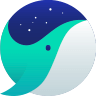
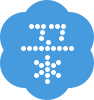

In [265]:
from bs4 import BeautifulSoup
import requests as rq

url = "http://www.naver.com" 

nav = rq.get(url)
html = nav.text
bs = BeautifulSoup(html,'lxml')
bs

In [266]:
span = bs.find_all('span')

import re

span = str(span)
span2 = re.findall('[가-힣]+',span)

span2 = ' '.join(span2)
span2

'뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 네이버 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 클래스를 추가해주세요 삭제 설정이 초기화 된다면 도움말 을 확인해주세요 설정이 초기화 된다면 도움말 을 확인해주세요 도움말 도움말 클래스를 추가해주세요 자동저장 끄기 클래스를 추가해주세요 자동저장 끄기 회차 당첨번호 추첨 지급기한 년 추첨 지급기한 년 원 원 날씨별 맑음 낮 맑음 밤 구름조금 낮 구름조금 밤 구름많음 낮 구름많음 밤 흐림 약한비 비 강한비 약한눈 눈 강한눈 진눈깨비 소나기 안개 소낙눈 번개뇌우 우박 황사 비또는눈 가끔비 가끔눈 가끔비또는눈 흐린후갬 뇌우후갬 비후갬 눈후갬 흐려져비 흐려져눈 날씨별 맑음 낮 맑음 밤 구름조금 낮 구름조금 밤 구름많음 낮 구름많음 밤 흐림 약한비 비 강한비 약한눈 눈 강한눈 진눈깨비 소나기 안개 소낙눈 번개뇌우 우박 황사 비또는눈 가끔비 가끔눈 가끔비또는눈 흐린후갬 뇌우후갬 비후갬 눈후갬 흐려져비 흐려져눈 바로가기 바로가기 추가 최근검색어 있으면 날짜 표시 추가 추가 클래스를 추가해주세요 클래스를 추가해주세요 자세히보기 도움말 신고 도움말 신고 클래스를 추가해주세요 자동완성 끄기 클래스를 추가해주세요 자동완성 끄기 쇼핑 쇼핑 최저기온 최고기온 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 개의 글 이전 다음 시간 전 한국경제 한국경제 일 전 다방 공식 포스트 다방 공식 포스트 일 전 어제 아시아경제 아시아경제 주일 전 살구뉴스 살구뉴스 재생 재생시간 재생시간 주일 전 한국경제 신속한 경제 증권 채널 한국경제 신속한 경제 증권 채널 재생 재생시간 재생시간 주일 전 한국경제 신속한 경제 증권 채널 한국경제 신속한 

#### 과제 0725_4

"http://www.naver.com" 사이트에서 span 태그에 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 출력하세요.

In [332]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = "http://www.naver.com" 

nav = rq.get(url)
html = nav.text
bs = BeautifulSoup(html,'lxml')

texts = bs.find_all('span')
li = []
for t in texts:
    li.append(t.get_text())
print(li)

['뉴스스탠드 바로가기', '주제별캐스트 바로가기', '타임스퀘어 바로가기', '쇼핑캐스트 바로가기', '로그인 바로가기', '매일 쓰는 브라우저 보안이 걱정된다면, 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.', '매일 쓰는 브라우저 보안이 걱정된다면, ', '다운로드', '네이버', '쥬니어네이버', '해피빈', '검색', '', '한글 입력기', '', '자동완성 레이어', '', '@txt@', '', '@txt@', '\n@date@.\n\n삭제\n', '설정이 초기화 된다면 도움말을 확인해주세요.', '설정이 초기화 된다면 도움말을 확인해주세요.', '\n도움말\n', '도움말', '\n\n\n자동저장 끄기\n\n', '\n\n자동저장 끄기\n', '', '@5@회차 당첨번호', '\n추첨 @13@.지급기한 1년\n', '추첨 @13@.', '지급기한 1년', '\n\n@6@@7@@8@@9@@10@@11@@12@\n\n', '\n@6@@7@@8@@9@@10@@11@@12@\n', '@14@', '@txt@@currency@', '@currency@', '\n@8@(@9@%)\n', '@8@(@9@%)', '\n@6@원\n', '@6@원', '', '@txt@', '\n@7@, @message@\n', '@7@, @message@', '\n\n\n@7@\n@8@°\n\n', '\n\n@7@\n@8@°\n', '@7@', '', '@txt@', '\n@5@\n', '@5@', '\n바로가기\n', '바로가기', '@txt@', '', '\n추가\n', '@txt@', '', '\n\n@date@.\n추가\n', '@query@ @intend@', '', '@intend@', '\n추가\n', '', '\n\n\n\n자세히보기\n', '', '\n도움말\n신고\n', '도움말', '신고', '\n\n\n자동완성 끄기\n\n', '\n\n자동완성 끄기\n', '쇼핑', '쇼핑LIVE', '23.0°', '33.0°', '이태원동', '이태원동', 

b = ''
for i in items:
    b += i.get_text()

In [331]:
li = str(li)
li2 = re.sub('[^\w]',' ', li)
li2 = re.sub('[n]',' ',li2)
li2 = re.sub(' +',' ',li2)
li2

' 뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 네이버 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 txt txt date 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 5 회차 당첨번호 추첨 13 지급기한 1년 추첨 13 지급기한 1년 6 7 8 9 10 11 12 6 7 8 9 10 11 12 14 txt curre cy curre cy 8 9 8 9 6 원 6 원 txt 7 message 7 message 7 8 7 8 7 txt 5 5 바로가기 바로가기 txt 추가 txt date 추가 query i te d i te d 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑LIVE 23 0 33 0 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 671 개의 글 이전 다음 1개월 전 한경BP 한경BP 1개월 전 문학수첩 문학수첩 1개월 전 알에이치코리아 알에이치코리아 1개월 전 동양북스 동양북스 1개월 전 문예춘추사 문예춘추사 집계기간 2022 07 18 2022 07 24 제공 인터넷 교보문고 이전 다음 1위 위 2위 위 3위 위 4위 위 5위 위 6위 위 7위 위 8위 위 9위 위 10위 위 11위 위 12위 위 13위 위 14위 위 15위 위 16위 위 17위 위 18위 위 19위 위 20위 위 1개월 전 한겨레출판 한겨레출판 1개월 전 청림출판 청림출판 3주일 전 컬처블룸 컬처블룸 1개월 전 북라이프 북라이프 1개월 전 프네우마 프네우마 NAVER 이전 다음 코로나바이러스감염증 19 현황 하락6 14 0 53 하락 하락66 3

#### 과제 0725_5
"http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 한줄에 출력하세요.

In [334]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = "http://www.naver.com"

naver = rq.get(url)
html = naver.text
bs = BeautifulSoup(html,'lxml')

atag = bs.find_all('a', id=True)
atag

[<a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="btn_keyboard" href="#" id="ke_kbd_btn" onclick="return false;" role="button"><span class="blind">한글 입력기</span><span class="ico_keyboard"></span></a>,
 <a aria-pressed="false" class="btn_arw _btn_arw fold" data-atcmp-element="" href="#" id="nautocomplete" role="button" tabindex="2"><span class="blind">자동완성 레이어</span><span class="ico_arr"></span></a>,
 <a class="btn_set" data-clk="tca.like" href="#" id="NM_THEME_EDIT_SET" role="button">관심주제 설정</a>,
 <a class="content_top" href="#wrap" id="NM_scroll_top_btn"><span class="blind">TOP</span></a>]

In [338]:
li = []
for a in atag:
    li.append(a.get_text())
print(li)

li = ' '.join(li)
li

['다운로드', '네이버를 시작페이지로', '한글 입력기', '자동완성 레이어', '관심주제 설정', 'TOP']


'다운로드 네이버를 시작페이지로 한글 입력기 자동완성 레이어 관심주제 설정 TOP'

#### 과제 0725_6

url = 'https://news.naver.com/' 사이트 p태그에서 class가 cjs_ht인 데이터를  한글만을 불필요한 공백을 제거한 후 출력하세요.

In [13]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = 'https://news.naver.com/'

naver = rq.get(url)
html = naver.text
bs = BeautifulSoup(html,'lxml')

uu = bs.find_all('p',{'class':'cjs_ht'}) 
uu

[<p class="cjs_ht">
                         
                             
                                 오늘 언론사가 발행한<br/>종이신문에 실린 뉴스 1면<br/>기사가 제공됩니다.
                             
                             
                         
                     </p>]

In [14]:
uu = str(uu)
uu2= re.findall('[가-힣0-9]+', uu)
uu2 = ' '.join(uu2)
uu2

'오늘 언론사가 발행한 종이신문에 실린 뉴스 1면 기사가 제공됩니다'

In [21]:
from bs4 import BeautifulSoup
import urllib.request as rq

url = 'https://naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')

#print(bs.find('p'))
#print(bs.find_all('p'))
print(bs.find_all('p', limit=1),'\n')  # p태그 1개
print(bs.find_all('p', limit=2),'\n')  # p태그 2개
print(bs.find_all('p', limit=3))       # p태그 3개

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>, <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>]


In [31]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html,'lxml')

title = bs.find_all('h2', id=True)
print(title)

title = bs.find('h2', id='mainContent').text
title

[<h2 class="screen_out" id="mainContent">정치</h2>]


'정치'

In [27]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html,'lxml')
                         # class_ 언더바
#title = bs.find('span', class_='txt_gnb').text

#   #gnbContent > div > ul > li.on > a > span
title = bs.select_one('#gnbContent > div > ul > li.on > a > span').text

title

'정치'

In [29]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html,'lxml')

title = bs.find('a', href='/politics').text
title

'정치'

In [51]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'

html = rq.get(url)
bs = BeautifulSoup(html.text, 'lxml')

title = bs.find_all('div', class_="tit3")
#for t in title:
#    print(t.text)
print(title[0].text)


외계+인 1부



In [54]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'

html = rq.get(url)
bs = BeautifulSoup(html.text, 'lxml')

title = bs.find('div', class_="tit3").text
title[1:-1]

'외계+인 1부'

#### 과제 0726_1

네이버 영화 랭킹 가져와서 조회순 전체 영화제목을 출력하세요. (출력방식 >> 1위: 외계+인 1부)

In [212]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'

html = rq.get(url).text
bs = BeautifulSoup(html, 'lxml')

movies = bs.find_all('div', class_='tit3')


rank = 0
for movie in movies:
    for i in range(1):
        rank += 1
    movie = movie.text
    print(f'{rank}위 {movie}')

1위 
외계+인 1부

2위 
탑건: 매버릭

3위 
한산: 용의 출현

4위 
헤어질 결심

5위 
범죄도시2

6위 
그레이 맨

7위 
토르: 러브 앤 썬더

8위 
미니언즈2

9위 
마녀(魔女) Part2. The Other One

10위 
더 킬러: 죽어도 되는 아이

11위 
비상선언

12위 
엘비스

13위 
명탐정 코난: 할로윈의 신부

14위 
뒤틀린 집

15위 
헌트

16위 
썸머 필름을 타고!

17위 
멘

18위 
아이를 위한 아이

19위 
브로커

20위 
놉

21위 
쥬라기 월드: 도미니언

22위 
메모리

23위 
닥터 스트레인지: 대혼돈의 멀티버스

24위 
핸썸

25위 
뽀로로 극장판 드래곤캐슬 대모험

26위 
로스트 도터

27위 
오싹한 동거

28위 
니얼굴

29위 
탑건

30위 
임파서블 러브

31위 
범죄도시

32위 
굿 럭 투 유, 리오 그랜드

33위 
큐어

34위 
버즈 라이트이어

35위 
군다

36위 
스파이형 모델

37위 
극장판 주술회전 0

38위 
섹스 앤 퓨리

39위 
명량

40위 
VR 파이터

41위 
불릿 트레인

42위 
리미트

43위 
마녀

44위 
감동주의보

45위 
특송

46위 
귀멸의 칼날: 아사쿠사 편

47위 
클라우스

48위 
레지던트 이블: 라쿤시티

49위 
아바타: 물의 길

50위 
이상한 나라의 수학자



In [ ]:
re.sub('\s{2,}','',wf)
wf = re.sub('[^가-힣0-9()~.,m]',' ',wf)

In [57]:
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""
import re
bs = BeautifulSoup(html,'html.parser')
li = bs.find_all(href=re.compile('^https://'))  # ^ 넣어도되고 안넣어도되고 ^ 는 요고로 시작하는거 $ 는 요고로 끝나는거
for e in li:
    print(e.attrs['href'])

https://example.com/fuga
https://example.com/foo


### CSS 선택자
- 원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
- (CSS 선택자 설명 추가)
- F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
- BeautifulSoup의 select_one, select 활용


In [67]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
bs = BeautifulSoup(r.text,'lxml')

         # 첫번째 태그(div) 뒤에 붙은건 지워줘야 다 뜸 
#body > div[.container-doc.cont-category]요고 > main > section > div.main-sub > div.box_g.box_news_major > ul

lines = bs.select('body > div > main > section > div > div > ul > li > strong > a')
# print(lines)

body = '\n'.join([line.text for line in lines])
print(body)

野 "두달만에 민주주의 통째로 부정"..'尹정부 경찰장악 규탄' 총공세
한 총리 "경찰국 신설, 경찰청 통솔 민주적으로 관장 하는 것"
[취재파일] 박진 외교장관 8월 방중..본격 시험대 오른 대중국 외교
민주당 "경찰국 설치 절차적 하자..尹, 경찰국가 만들려 해"
6·25 전쟁 교육자료, 유엔 참전국 교사들이 직접 만든다
정의, 경찰국 신설에 "與 우회 입법..野 원인 제공자" 비난
국제인권연맹∙NKDB, '북한 장애인 인권 실태' 지적 의견서 유엔 제출
尹의 업무보고 방식에 박지원 "세상에 그런 천재가 없어요" 힐난
2주째 잠행한 김정은..'전승절' 맞아 공식 석상 등장에 주목
정청래 "이재명 사법 리스크? 저쪽 프레임에 우리가 내부총질"


In [312]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
bs = BeautifulSoup(r.text,'lxml')

line=bs.select_one('body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1) > strong > a')
line.text

"'컷오프 전 단일화 선언' 물 건너가나..97그룹 맥주회동 무산"

##### Q. "2주 넘게 '두문불출' 김 여사..목요일 등장할까?" 제목의 기사 내용을 출력하세요.(불필요한 공백 제거)

In [322]:
import requests as rq
from bs4 import BeautifulSoup
import re

url = 'https://news.v.daum.net/v/20220726170003336'
r = rq.get(url)
bs = BeautifulSoup(r.text,'lxml')

line=bs.select_one('#harmonyContainer > section')
article = line.text         # 요기 밑에 article에 line.text 넣으면 조타
#article = re.sub('\n',' ',article)
#article = re.sub(' +',' ',article)

# 엔터가 됨
print(re.sub('\s{2,}','\n',article))


일정 기간이 지난 뒤 상장 폐지되는 상장지수펀드(ETF)가 빠르면 오는 9월 중 출시된다. 기존 채권형 ETF와 달리 만기를 가진 상품인 채권과 투자 기간을 일치시킬 수 있어 금리 변동에도 안정적으로 이자수익을 거둘 수 있을 것으로 기대된다.
자산운용업계는 채권을 매입하기 어려운 소규모 기금과 최근 채권투자에 관심이 커지고 있는 개인투자자들의 수요가 높을 것으로 예상하면서 상품 출시를 서두르고 있다.
/그래픽=비즈니스워치
ETF와 채권 만기 맞춘 상품 곧 출시
한국거래소는 최근 존속 기한이 있는 ETF(기간 만기 ETF) 도입을 위한 상장 규정 개정을 예고하고 이해관계자와 시장참여자를 대상으로 의견을 수렴하고 있다.
현재 거래소는 규정상 ETF에 존속 기한을 설정하는 것을 금지하고 있으나 채권에 투자하는 ETF에 한정해 존속 기한을 설정할 수 있도록 할 예정이다.
앞서 지난해 1월 금융위원회는 '공모펀드 경쟁력 제고 방안'을 발표하고 상품 다각화 차원에서 존속 기한이 있는 채권형 ETF를 도입하겠다고 밝힌 바 있다. 당초 연내 도입 계획이었으나 검토하는데 시간이 지체되면서 올해 규정을 바꾸기로 했다.
기간 만기 ETF가 도입될 경우 채권과 만기를 맞출 수 있게 된다. 기존 채권형 ETF는 만기가 없어 채권 듀레이션(원금 회수 기간)이 고정돼 금리 변동에 따라 상품 가격 변동성이 커졌다. 그러나 기간 만기 ETF는 시간이 지날수록 채권 듀레이션이 짧아져 원금과 이자를 안정적으로 받을 수 있다.
투자기한과 예상 수익률이 확정되는 만큼 보험사와 공제회 등 기관투자자들이 관심을 가질 것으로 보이는 가운데 특히 대학 기금 등 전문 운용인력이 없는 소규모 기금에서 수요가 높을 것으로 예상된다. 통상 채권은 주로 100억원 단위로 거래되는 등 매매단위가 크다. 채권을 매입하기 어려운 소규모 기금의 경우 만기가 존재하는 ETF를 매수해 채권에 투자한 것과 같은 효과를 누릴 수 있다.
거래소 관계자는 "규정 개정이 계획대로 8월 말에 될 경우 이르면 오는 9월 존속 기한이 

In [324]:
import requests as rq
from bs4 import BeautifulSoup
import re

url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url)
bs = BeautifulSoup(r.text,'lxml')

line=bs.select('#harmonyContainer > section')
article = [line.text for line in lines]
article = ' '.join(article)
article

# 요곤 왜안되지??

"2주 넘게 '두문불출' 김 여사..목요일 등장할까?"

### 크롤링 접속 차단 되었을 때 : User-Agent 지정 (header)
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221185808375


### **내꼬 User-Agent

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36

In [325]:
from bs4 import BeautifulSoup
import requests

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
req = requests.get(url)
bs = BeautifulSoup(req.content, 'html.parser')
print(bs)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [97]:
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
req = requests.get(url, headers=headers)
bs = BeautifulSoup(req.content, 'html.parser')
print(bs)


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="사회 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=102" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="교육, 언론, 의료, 인물, 사건사고 등 사회 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="사회 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="t

In [105]:
target = bs.select_one('#main_content > div > div._persist > div:nth-child(1) > div:nth-child(1) > div.cluster_body > ul > li:nth-child(1) > div.cluster_text > a')
print(target.text,'\n')
print(target,'\n')
print(target['class'],'\n')
print(target['href'])

"300만원 넘게 줬는데…" 부모님 집 '2in1 에어컨' 설치 논란 

<a class="cluster_text_headline nclicks(cls_nav.clsart)" href="https://n.news.naver.com/mnews/article/015/0004728410?sid=102">"300만원 넘게 줬는데…" 부모님 집 '2in1 에어컨' 설치 논란</a> 

['cluster_text_headline', 'nclicks(cls_nav.clsart)'] 

https://n.news.naver.com/mnews/article/015/0004728410?sid=102


In [106]:
target = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')
for element in target:
    print(element.text)
    print(element['href'])

"300만원 넘게 줬는데…" 부모님 집 '2in1 에어컨' 설치 논란
https://n.news.naver.com/mnews/article/015/0004728410?sid=102
에어컨 위에 또 에어컨 설치…이게 투인원?
https://n.news.naver.com/mnews/article/016/0002020309?sid=102
"에어컨 위에 또 에어컨 설치…70대 우리 부모님도 당했다"
https://n.news.naver.com/mnews/article/421/0006240077?sid=102
"300만원 줬는데"…에어컨 위에 또 에어컨 설치 '시끌'
https://n.news.naver.com/mnews/article/011/0004080019?sid=102
신규 확진 10만명 육박… 97일만에 최다 확진(종합)
https://n.news.naver.com/mnews/article/417/0000836235?sid=102
코로나19 신규확진 9만9327명, 석달 만에 다시 10만명 육박···위중증 168명
https://n.news.naver.com/mnews/article/032/0003162332?sid=102
신규 확진 9만9327명…위중증 168명·사망 17명
https://n.news.naver.com/mnews/article/437/0000307119?sid=102
확진 9만 9327명, 97일만 최다…'더블링'은 주춤(종합)
https://n.news.naver.com/mnews/article/018/0005277048?sid=102
광주 답안지 유출 사립고, 학생들이 교사 노트북에 악성 코드 심어 빼돌려
https://n.news.naver.com/mnews/article/469/0000688185?sid=102
'답안 유출 의혹' 사실로.."교사 컴퓨터에 악성코드"
https://n.news.naver.com/mnews/article/660/0000013293?sid=102
밤중 교무실 잠입한 고교생 2명, 교사 노트북서 기말고사 답 

### 이미지 추출

In [112]:
import requests as rq
url = 'https://n.news.naver.com/mnews/article/015/0004729032?sid=102'
r = rq.get(url, headers=headers).text
bs = BeautifulSoup(r,'lxml')
target = bs.select_one('#img1')
print(target)
print('-'*100)
print(target['data-src'])

<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/015/2022/07/26/0004729032_001_20220726110701052.jpg?type=w647" id="img1"/>
----------------------------------------------------------------------------------------------------
https://imgnews.pstatic.net/image/015/2022/07/26/0004729032_001_20220726110701052.jpg?type=w647


##### Q. url='https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100' 사이트에서 뉴스 기사를 출력하세요.
용도는 주요 키워드 분석을 위한 데이터 셋 만들기

In [151]:
import requests as rq
from bs4 import BeautifulSoup
import re

url='https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100' 
r = rq.get(url, headers=headers)
bs = BeautifulSoup(r.text,'lxml')

tar = bs.select('#main_content > div')
#print(tar)
for element in tar:
    print(element.text)

#li=[]
#for element in tar:
#    li.append(element.text)
#print(li)

#li = str(li)
#li2 = re.sub('[^\w]',' ', li)
#li2 = re.sub('[n]',' ',li2)
#li2 = re.sub(' +',' ',li2)
#li2

# 요고 왜안되지 다시 찾아보기
#article = [r.text for i in tar]
#print(article)




안내헤드라인 뉴스


                            헤드라인 뉴스와 각 기사묶음 타이틀은  기사 내용을 기반으로 자동 추출됩니다.
                        

닫기

















한총리 "경찰국 신설안, 더 투명하고 민주적인 관장 위한 것"
한덕수 국무총리는 26일 행정안전부 내 경찰국 신설을 위한 시행령 개정안에 대해 "청와대 민정수석비서관실이 관장하던 실질적인 경찰청에 대한 통솔을, 내각 …

아시아경제






이데일리

정부, 하반기 개량백신 도입…경찰국 신설 안건 국무회의 통과(상보)





뉴시스

한 총리 "행안부 경찰국, 경찰 투명하고 민주적으로 통솔"





한국경제

[속보] 한덕수 총리, 코로나 개량백신 하반기 도입…"8월말 계획 발표"






16개의 관련뉴스 더보기











동영상기사




"중대한 기강 문란"‥ 경찰국 신설 '의결'
◀ 앵커 ▶ 행정안전부의 경찰국 신설을 두고 경찰 내부 반발이 확산하자 윤석열 대통령이 전면에 나서 "중대한 국가의 기강문란"이라 비판했습니다. 경찰국  …

MBC






세계일보

취임 후 벌써 두 번째…경찰 향한 尹 대통령의 ‘국기 문란’ 격노





YTN

 尹, 작심한 듯 강경발언..."경찰 집단반발, 중대 국가 기강문란 될 수 있다"[현장영상+]





SBS

윤 대통령, 경찰 집단반발에 "중대 국가기강문란"






66개의 관련뉴스 더보기















尹대통령 “여가부 폐지 로드맵 조속 마련하라”
여가부 업무보고서 주문 부처 개편안 보고 안했는데 지시 조직 역할 재편 등 속도 붙을 전망 男 성폭력 피해자 보호시설 설치 17만 아이돌보미 양성안 등  …

세계일보






MBC

윤 대통령 "여가부 폐지안 조속히 마련"





MBC

여성가족부, 추진과제 보고했더니‥윤 대통령 "폐지 로드맵 조속히"





서울신문

‘폐지’ 콕 집어 지시한 尹… 다급해진 여가부 “빨리 추진하겠다”

In [152]:
from konlpy.tag import Okt
from collections import Counter
from bs4 import BeautifulSoup
import requests

url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
rqs = requests.get(url,headers=headers).text
bs = BeautifulSoup(rqs,'lxml')
bs = bs.find_all('div',class_='cluster')
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid


[('경찰', 27),
 ('뉴스', 22),
 ('대통령', 22),
 ('장관', 20),
 ('관련', 18),
 ('보기', 18),
 ('의원', 15),
 ('정부', 14),
 ('민주당', 13),
 ('신설', 13),
 ('법무부', 12),
 ('윤석열', 10),
 ('업무', 10),
 ('박범계', 10),
 ('국민', 9),
 ('보고', 9),
 ('연합뉴스', 8),
 ('안철수', 8),
 ('행정안전부', 7),
 ('반발', 7),
 ('일보', 7),
 ('강훈', 7),
 ('집단', 7),
 ('기사', 6),
 ('문란', 6),
 ('오늘', 6),
 ('한동훈', 6),
 ('행안부', 6),
 ('시행', 6),
 ('북송', 6),
 ('여랑', 6),
 ('국기', 5),
 ('권성동', 5),
 ('임종석', 5),
 ('지지', 5),
 ('대표', 5),
 ('여가부', 5),
 ('폐지', 5),
 ('인사', 5),
 ('질문', 5),
 ('방역', 5),
 ('사면', 5),
 ('용산', 4),
 ('여야', 4),
 ('명과', 4),
 ('반대', 4),
 ('참전용사', 4),
 ('추모', 4),
 ('선언', 4),
 ('총리', 4),
 ('추천', 4),
 ('로드맵', 4),
 ('행동', 4),
 ('대해', 4),
 ('진중권', 4),
 ('현직', 4),
 ('국회', 4),
 ('박지원', 4),
 ('스타', 4),
 ('이슈', 4),
 ('국무회의', 4),
 ('권영세', 4),
 ('강제', 4),
 ('승인', 4),
 ('김경수', 4),
 ('배현진', 4),
 ('채널', 4),
 ('헤드라인', 3),
 ('내용', 3),
 ('용납', 3),
 ('대한', 3),
 ('대통령실', 3),
 ('에덴', 3),
 ('교회', 3),
 ('보은', 3),
 ('행사', 3),
 ('공개', 3),
 ('중앙', 3),
 ('지시', 3),
 ('조속', 

#### 과제 0726_2
네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요. (용도는 전체, 카테고리별 키워드 분석을 위한 시각화임을 감안하여 데이터 수집 및 전처리 수행)
- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


### 웹 구조 파악 
sid1 = 100 (정치), sid2=265 (국회/정당), page =

https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100 (정치)
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=265 (국회/정당)
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2=265&sid1=100&date=20220726&page=27 (page)
    


In [ ]:
# url 수정
url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)

In [154]:
import pandas as pd
news_df = pd.DataFrame(columns=['news','category'])
news_df

,news,category


In [159]:
import requests
from bs4 import BeautifulSoup

cats=[264,265,268,267]
ind=0 # 행 번호 
for cat in cats:  # 다중 포문
    for i in range(15): #range는 페이지 수
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks=[]
        
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            news = re.sub('\n','',news) # 개행 공백으로
            news = re.sub('\t','',news) # tab 공백으로
            news_df.loc[ind] = [news,cat]
            ind += 1
news_df

,news,category
0,"기사내용 요약尹 대통령 부부 등에 직권남용 혐의 사건시민단체 ""사적 인연 우선해 채...",264
1,법무부 업무보고 받는 윤석열 대통령 (서울=연합뉴스) 안정원 기자 = 윤석열 대통령...,264
2,"윤석열 대통령이 26일 복심인 한동훈 법무부 장관에 ""기업활동을 위축시키는 과도한 ...",264
3,(서울=뉴스1) 안은나 기자 = 한동훈 법무부 장관이 26일 용산 대통령실에서 윤석...,264
4,기사내용 요약전담수사부서 살리고 형사부 수사권 부여검경 협의회 통해 '검수완박' 시...,264
...,...,...
1171,"법무부, 대통령 업무보고…""부정부패 선제 대응""범죄정보 수집 기능 강화·공수처 '우...",267
1172,(서울=연합뉴스) 서명곤 기자 = 한동훈 법무부 장관이 26일 오전 서울 용...,267
1173,(서울=연합뉴스) 서명곤 기자 = 한동훈 법무부 장관이 26일 오전 서울 용...,267
1174,(서울=연합뉴스) 서명곤 기자 = 한동훈 법무부 장관이 26일 서울 용산 대...,267


In [214]:
import pandas as pd
news_df = pd.DataFrame(columns=['news','category'])
news_df

,news,category


In [227]:
news_df1 = news_df.copy()
news_df2 = news_df.copy()
news_df3 = news_df.copy()
news_df4 = news_df.copy()

In [218]:
import requests
from bs4 import BeautifulSoup

cats=[264,265,268,267]
ind=0 # 행 번호 
for cat in cats:  # 다중 포문
    for i in range(15): #range는 페이지 수
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks=[]
        
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중보 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            news = re.sub('\n','',news) # 개행 공백으로
            news = re.sub('\t','',news) # tab 공백으로
            news_df.loc[ind] = [news,cat]
            ind += 1
news_df1

,news,category
0,(서울=뉴스1) 안은나 기자 = 한동훈 법무부 장관이 26일 용산 대통령실에서 윤석...,264
1,윤석열 대통령이 26일 오전 서울 용산 대통령실 청사에서 한동훈 법무부 장관으로부터...,264
2,"종지협, 광복절 앞두고 윤 대통령에 전달“정치인·경제인 비롯해 서민 생계형 대대적 ...",264
3,25일 오후 경기도 이천 육군항공사령부에서 열린 대규모 항공작전 훈련에서 AH-64...,264
4,“북송 자체 승인 아니라 판문점 출입 관한 것” 설명국방부 부대변인 “북송 관할은 ...,264
...,...,...
997,(이천=뉴스1) 사진공동취재단 = 지난 25일 경기도 육군 항공사 이천기지에서 대규...,267
998,(이천=뉴스1) 사진공동취재단 = 지난 25일 경기도 이천시 육군항공사령부에서 열린...,267
999,[이천=뉴시스] 사진공동취재단 = 육군이 지난 25일 경기도 육군 항공사 이천기지에...,267
1000,[양평=뉴시스] 사진공동취재단 = 육군이 지난 25일 경기도 양평 비승사격장에서 열...,267


In [54]:
! pip install -U --force-reinstall pip

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [231]:
import requests
from bs4 import BeautifulSoup

cats=[259,258,261,262,260]
ind=0 # 행 번호 
for cat in cats:  # 다중 포문
    for i in range(15): #range는 페이지 수
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=101&date=20220726&page='+str(i+1)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks=[]

        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거

        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            news = re.sub('\n','',news) # 개행 공백으로
            news = re.sub('\t','',news) # tab 공백으로
            news_df2.loc[ind] = [news,cat]
            ind += 1

news_df2

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [232]:
import requests
from bs4 import BeautifulSoup

cats=[241,237,242,248,245]
ind=0 # 행 번호 
for cat in cats:  # 다중 포문
    for i in range(15): #range는 페이지 수
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=103&date=20220726&page='+str(i+1)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks=[]
        
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            news = re.sub('\n','',news) # 개행 공백으로
            news = re.sub('\t','',news) # tab 공백으로
            news_df3.loc[ind] = [news,cat]
            ind += 1
news_df3

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [233]:
import requests
from bs4 import BeautifulSoup

cats=[227,230,283,228]
ind=0 # 행 번호 
for cat in cats:  # 다중 포문
    for i in range(15): #range는 페이지 수
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=105&date=20220726&page='+str(i+1)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks=[]
        
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            news = re.sub('\n','',news) # 개행 공백으로
            news = re.sub('\t','',news) # tab 공백으로
            news_df4.loc[ind] = [news,cat]
            ind += 1
news_df4

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [36]:
# 민섭님이 준 json
import json
import pandas as pd

with open('news_df','r') as f:
    js = json.loads(f.read())
    df = pd.DataFrame(js)
    df = pd.read_json('news_df')
df

,news,category
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264
2,[포토] 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264
...,...,...
3049,프랑스 유텔샛 “스페이스X 게 섰거라”,228
3050,"크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴",228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,"클래시스 “알파, 복부 지방감소 효과 연구 국제학술지 게재”",228


In [23]:
df.category.unique()

array([264, 265, 267, 268, 259, 258, 261, 262, 260, 241, 237, 242, 248,
       245, 227, 230, 283, 228], dtype=int64)

In [6]:
df.category.value_counts()

264    200
265    200
267    200
230    200
259    200
258    200
261    200
245    200
260    200
228    186
242    175
248    168
237    160
283    146
262    135
241    125
268     92
227     67
Name: category, dtype: int64

In [37]:
# 특수문자 제거
df['news'] = df['news'].str.replace(pat='[^\w+]',repl=' ',regex=True)
df

,news,category
0,尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시,264
1,국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐,264
2,포토 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청,264
...,...,...
3049,프랑스 유텔샛 스페이스X 게 섰거라,228
3050,크리스탈지노믹스 제이앤씨사이언스와 코로나19 치료제 후보 발굴,228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,클래시스 알파 복부 지방감소 효과 연구 국제학술지 게재,228


In [46]:
# 일치하는 요소 확인 isin

df_1 = df[df.category.isin([264,265,268,267])] #정치
df_2 = df[df.category.isin([259,258,261,262,260])] #경제
df_3 = df[df.category.isin([259,258,261,262,260])] #생활/문화
df_4 = df[df.category.isin([259,258,261,262,260])] #IT/과학

,news,category
0,尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시,264
1,국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐,264
2,포토 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청,264
...,...,...
687,북 아사자 발생 놀랄 일 아냐,268
688,첫 대정부 질문 탈북어민 강제북송 흉악범이어도 잘못된 것,268
689,북 아사자 발생 놀랄 일 아냐,268
690,첫 대정부 질문 탈북어민 강제북송 흉악범이어도 잘못된 것,268


In [39]:
df_1 = df[(df['category']==264)|(df['category']==265)|(df['category']==268)|(df['category']==267)]
df_1

,news,category
0,尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시,264
1,국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐,264
2,포토 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청,264
...,...,...
687,북 아사자 발생 놀랄 일 아냐,268
688,첫 대정부 질문 탈북어민 강제북송 흉악범이어도 잘못된 것,268
689,북 아사자 발생 놀랄 일 아냐,268
690,첫 대정부 질문 탈북어민 강제북송 흉악범이어도 잘못된 것,268


In [40]:
df_2 = df[(df['category']==259)|(df['category']==258)|(df['category']==261)|(df['category']==262)|(df['category']==260)]
df_2

,news,category
692,시중은행 전체로 번진 수상한 외환거래 은행 제재 불가피,259
693,현대해상 코로나로 미뤘던 해외사업 속도,259
694,10년간 동일 업무 담당한 우리은행 횡령범 명령휴가 대상도 아니었다,259
695,농협금융 상반기 순이익 1조3505억원 사상 최대 전년比 5 3 증가,259
696,신한라이프 MZ세대 겨냥 콘텐츠로 보험 유튜브 분야 대상 수상,259
...,...,...
1622,신 新 교통거점 거듭나는 용산 지하도로 링킹파크 에 도심항공까지,260
1623,현대건설 힐스테이트 서대구역 센트럴 오피스텔 27일 청약,260
1624,주거 투자 가치 남다른 아끌레르 광진 프리미어 스위트 28일 청약접수 진행,260
1625,용산정비창 용적률 1500 초과 고밀개발 초고층빌딩 올린다,260


In [41]:
df_3 = df[(df['category']==241)|(df['category']==237)|(df['category']==242)|(df['category']==248)|(df['category']==245)]
df_3

,news,category
1627,이종이식 한걸음 가까워진다,241
1628,86세 여성 CEO가 말하는 100세까지 건강하게 사는 법 호기심 그리고 메모...,241
1629,악몽도 심하면 병 벗어나는 방법은,241
1630,환경보건시민센터 휴대용 선풍기 전자파 측정,241
1631,낮잠 자주 자면 혈압 높아진다,241
...,...,...
2450,고물가에 통신비도 짠소비 위메프 알뜰폰 자급제폰 결합 인기,245
2451,지상갤러리,245
2452,7개 전국국제공항 2년 5개월 만에 국제선 하늘길 활짝,245
2453,국립문화재연구원 파주 육계토성 백제 초 축조 확인,245


In [42]:
df_4 = df[(df['category']==227)|(df['category']==230)|(df['category']==283)|(df['category']==228)]
df_4

,news,category
2455,SKT 누구 안심 개편 5개월 만에 서비스 종료 왜,227
2456,디지털 융합 K 콘텐츠의 힘 SK텔레콤 스튜디오 연결로 제작 초협력 지원,227
2457,디지털 융합 K 콘텐츠의 힘 CJ ENM 32K 초고화질 버추얼 제작 지원,227
2458,KT 이지스 디지털트윈 분야 협력 현실과 같은 가상공간 구축한다,227
2459,무선국 제도개선 민관협의체 8월 초 킥오프 규제 완화 논의,227
...,...,...
3049,프랑스 유텔샛 스페이스X 게 섰거라,228
3050,크리스탈지노믹스 제이앤씨사이언스와 코로나19 치료제 후보 발굴,228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,클래시스 알파 복부 지방감소 효과 연구 국제학술지 게재,228


In [38]:
df['news'] = df['news'].str.replace(pat='[^\w+]',repl=' ',regex=True)
df

,news,category
0,尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시,264
1,국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐,264
2,포토 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청,264
...,...,...
3049,프랑스 유텔샛 스페이스X 게 섰거라,228
3050,크리스탈지노믹스 제이앤씨사이언스와 코로나19 치료제 후보 발굴,228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,클래시스 알파 복부 지방감소 효과 연구 국제학술지 게재,228


1. 리뷰에서 영어표현, puncation, 이모티콘은 모두 제거한다. (=한글 표현만 남긴다)

2. 띄어쓰기 변환기를 통해 띄어쓰기가 되어있지 않은 문장들을 제대로 변환한다.

3. 형태소 분석기를 통해 각각의 리뷰를 형태소 단위로 분리한다.

4. 한글자로 되어있는 것 제거

5. 빈도수가 많은 순으로 정렬 후 의미없는 단어(불용어) 제거

6. 최소빈도수 이하의 것들은 제거한다.

7. 잘못 분리 된 의미있는 단어들을 찾아서 사용자 단어 사전에 추가 (ex. 디테일 => 디 + 테일로 분리됨)

In [263]:
target = df['news'].values # 시리즈에 .values  하면 배열이 되자나
title_list = target.tolist() # 리스트로 변환
text = ' '.join(title_list)
text

'  대통령  기업활동 위축시키는 과도한 형벌 규정 개선  지시 국방부  유엔사  판문점 통과 허용 북송 승인 의미는 아냐   포토  육군 대규모 항공작전 훈련   유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내  대 종단 지도자들  이명박 이재용 김경수 통큰 사면 요청   정치   윤대통령   국기 문란  경찰 질타 경찰 내부 반발 고조   대통령 최측근 한동훈 법무장관에 무슨 지시했나   대통령  법무행정 최우선은 경제 살리기 기업 위축하는 형벌규정 개선  문체부  청와대 활용 정부 내 혼선 없어 이미 정리   법무부 업무보고  한동훈  공수처  년  국가 범죄대응 역량 약화  쌍용차 채권단  변제율    상식적이지 않아   대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐   대통령과    만 경찰  대치 전선 고조 종합    한동훈에  기업활동 위축 과도한 형벌 개선하라  윤대통령  경찰 집단행동 국기문란  경찰국 신설안 국무회의 통과  검수완박 이전으로 회귀     한동훈에 수사권 강화 보고받아 국내  대 종단 지도자들  이명박 이재용 김경수 통큰 특별사면  탄원 윤 대통령  한동훈에  법무행정 최우선  경제 살리기  당부 한동훈    티타임 부활 지적에  언론으로부터 불편 질문받아야  박홍근  경찰국 신설  이상민 행안부 장관의 행정 쿠데타   포토  육군 이천기지서 열린 대규모 항공작전     한동훈  박범계  검언유착  지적에  전정부는 흘리기 없었나  한동훈  제가 인사 평가 주제 넘어  검증 시스템 안착 고민할 때     법무행정 최우선 경제에  한동훈  이재용 사면  언급 부적절  공수처    대통령  사적 채용 논란  고발 사건 수사 착수 공수처   대통령  사적채용 논란  고발건 수사 부 배당  대통령  기업 활동 위축 과도한 형벌 규정 개선   대통령  복심 한동훈 장관에  기업활동 위축 과도한 형벌규정 개선하라  지시    한동훈 장관에  기업 위축시키는 과도한 형벌 개선하라   뉴스       윤석열 대통령  경찰 

In [264]:
import re
text = re.sub('[^가-힣]+', ' ', text)
print(len(text))
text[:100]

80672


' 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시 국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐 포토 육군 대규모 항공작전 훈련 유럽에 이어 아세안과도 정상간 비즈'

In [267]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(text)  # pos 단어와 품사를 뽑아줌
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # Noun이고 단어 1글자 이상인것 뽑아줌 의미있눈거! 한글자는 조사자나
        noun_list.append(word)
#print(morph)
print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '무슨', '지시', '대통령', '법무', '행정', '우선', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '우선', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공', '작전', '한동훈

In [273]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])
df10 = df.sort_values(by='cnt',ascending=False)[:20]
df10.reset_index(inplace=True)
df10

,index,cnt
0,금융,134
1,장관,119
2,대통령,118
3,상반기,83
4,업무,82
5,한동훈,81
6,억원,80
7,경찰,79
8,한국,72
9,투자,71


<AxesSubplot:xlabel='index', ylabel='cnt'>

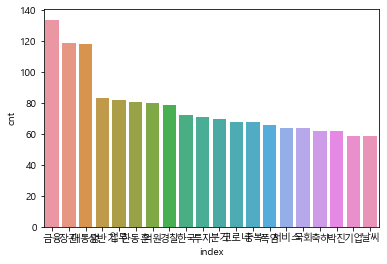

In [274]:
sns.barplot(x='index', y='cnt', data=df10, orient='v')

(-0.5, 7999.5, 5999.5, -0.5)

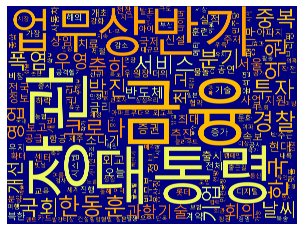

In [299]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='navy',
                     colormap='Wistia',width=8000,height=6000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

#### 7.27 HTML에서 부모, 자식, 자손 출력

In [47]:
html="""
<head>
    <title>crawler</title>
</head>
<body>
    <p class="a" align="center"> text1</p>
    <p class="b" align="center"> text2</p>
    <p class="c" align="center"> text3</p>
    <div>
        <img src="/source" width="300" height="200">
    </div>
</body>
</html>
"""

In [48]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(html, 'html.parser')
contents = bs.find('body')
contents

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

In [49]:
contents.children

In [50]:
# 자식 출력
for child in contents.children:
    print(child)



<p align="center" class="a"> text1</p>


<p align="center" class="b"> text2</p>


<p align="center" class="c"> text3</p>


<div>
<img height="200" src="/source" width="300"/>
</div>




In [51]:
# 자손이 별도로 나옴 맨 밑에 img
# body의 자손은 p, div, img
for d in contents.descendants:
    print(d)



<p align="center" class="a"> text1</p>
 text1


<p align="center" class="b"> text2</p>
 text2


<p align="center" class="c"> text3</p>
 text3


<div>
<img height="200" src="/source" width="300"/>
</div>


<img height="200" src="/source" width="300"/>






In [53]:
img_tag = contents.find('img')
img_tag

<img height="200" src="/source" width="300"/>

In [54]:
# 부모 출력 - 경우의 수 전부 해서 다 나옴
print(list(img_tag.parents))

[<div>
<img height="200" src="/source" width="300"/>
</div>, <body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>, 
<head>
<title>crawler</title>
</head>
<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

]


In [56]:
contents

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

In [55]:
# 태그 객체
contents.div.img

<img height="200" src="/source" width="300"/>

In [58]:
# 두번째 p태그 찾기
p_tag = bs.find('p',class_='b')
p_tag

<p align="center" class="b"> text2</p>

#### find_previous_sibling() : 바로 이전 형제 노드를 검색
#### find_previous_siblings() : 모든 이전 형제 노드를 검색

- find_next_sibling() : 바로 뒤
- find_next_siblings() :모든 뒤 형제

In [60]:
p_tag = bs.find('p',class_='c')
print(p_tag.find_previous_sibling())
print(p_tag.find_previous_siblings())

<p align="center" class="b"> text2</p>
[<p align="center" class="b"> text2</p>, <p align="center" class="a"> text1</p>]


In [61]:
import urllib
from bs4 import BeautifulSoup

response = urllib.request.urlopen('http://naver.com')
byte_data = response.read()
html = byte_data.decode('utf-8') # utf-8 : 
bs = BeautifulSoup(html,'html.parser')
print(bs.find_all('a',{'class':'link_newsstand'}))

[<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a>]


#### 해당되는 클래스에서 text만 뽑아오기

In [62]:
                                # 클래스 여러개는 두번 {} 묶어줌
nlists = bs.find_all('a',{'class':{'link_newsstand','btn_sort','btn_sort.sort_on'}})
for n in nlists:
    print(n.get_text())

뉴스스탠드
구독한 언론사
전체언론사


#### h태그는 모두 뽑을거야

In [66]:
hlists = bs.findAll({'h1','h2','h3','h4','h5','h6'},limit=5) # limit 있으면 그만큼만 나옴
for h in hlists:
    print(h.get_text())


네이버

뉴스스탠드
주제별 캐스트
Sign in
타임스퀘어


#### 과제 0727_1 
코스피 지수, 등락폭 및 등락율을 출력하세요.

In [108]:
import requests as rqs
from bs4 import BeautifulSoup

# 네이버 금융 국내증시 메인 사이트 주소
url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'

kospi = rqs.get(url)
bs = BeautifulSoup(kospi.text, 'lxml')

kos = bs.find('div',{'class':'quotient'})
print(kos.text)


2,414.10
1.14 +0.05%상승



In [107]:
import requests as rqs
from bs4 import BeautifulSoup

# 네이버 금융 국내증시 메인 사이트 주소
url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'

kospi = rqs.get(url)
bs = BeautifulSoup(kospi.text, 'lxml')

kos = bs.find('div',{'class':'quotient'})
print(kos.text)


2,414.10
1.14 +0.05%상승



#### id 에서 원하는 텍스트 뽑기 : id # class .

In [74]:
from bs4 import BeautifulSoup

fp = open('books.html', encoding='utf-8')
bs = BeautifulSoup(fp,'html.parser')
print(bs)
sel = lambda q : print(bs.select_one(q).string)
sel('#nu')
sel('#de')

<ul id="bible">
<li id="ge">Genesis</li>
<li id="ex">Exodus</li>
<li id="le">Leviticus</li>
<li id="nu">Numbers</li>
<li id="de">Deuteronomy</li>
</ul>
Numbers
Deuteronomy


In [89]:
# Q. 9개의 다른 방식으로 Numbers를 출력하세요.

sel('#nu')

sel('li#nu')
sel('#bible > #nu')
sel('#bible #nu')
sel('ul li#nu')
sel('ul > li#nu')
sel('ul #nu')
sel('ul > #nu')
sel('li:nth-child(4) ')
sel('ul li:nth-child(4)')

Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers


#### 과제 0727_2

네이버 뉴스 검색 사이트에서 총 필요한 뉴스기사 수를 입력하면 요청한 만큼 데이터프레임 형태(컬럼은 title, url)로 출력해 주는 크롤링 프로그램을 수행하세요.
https://search.naver.com/search.naver?where=news&sm=tab_jum&query=


In [49]:
import pandas as pd
news_df = pd.DataFrame(columns=['title','url'])
news_df

,title,url


In [18]:
import requests
from bs4 import BeautifulSoup

search=[input('검색어를 입력해주세요.')]
num = input('기사 수를 입력하세요.')
ind = 0

for sea in search:
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+str(search)+'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='+str(num)
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
    search = requests.get(url, headers=headers)
    bs = BeautifulSoup(search.text, 'lxml')
    links = bs.select(f'#sp_nws{num} > div > div > a')
    newslinks=[]

    for link in newslinks:
        res2 = requests.get(link, headers=headers).text
        bs2 = BeautifulSoup(res2, 'lxml')
        search = bs2.find('div', id='dic_area').text
        search = re.sub('\n','',news)
        search = re.sub('\t','',news)
        news_df.loc[ind] = [title,url]
        ind += 1
news_df

검색어를 입력해주세요.코로나
기사 수를 입력하세요.10


,title,url


In [20]:
import requests
from bs4 import BeautifulSoup

search = input('검색어를 입력하세요.')
num = input('기사 수를 입력하세요.')
ind += 1

url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+search+'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=18&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='+str(num)
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
search = requests.get(url, headers=headers)
bs = BeautifulSoup(search.text, 'lxml')

news_df.loc[ind] = [title,url]
ind += 1

검색어를 입력하세요.코로나
기사 수를 입력하세요.10


NameError: name 'title' is not defined

In [21]:
import requests
from bs4 import BeautifulSoup

search = input('검색어를 입력해주세요.')
num = input('기사 수를 입력하세요.')
ind = 0


url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+search+'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=18&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='+str(num)
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
search = requests.get(url, headers=headers)
bs = BeautifulSoup(search.text, 'lxml')
links = bs.select('#sp_nws23 > div > div > a')
newslinks=[]

for link in newslinks:
    res2 = requests.get(link, headers=headers).text
    bs2 = BeautifulSoup(res2, 'lxml')
    search = bs2.find('div.group_news > ul.list_news > li div.news_area > a').text
    search = re.sub('\n','',news)
    search = re.sub('\t','',news)
    news_df.loc[ind] = [title,url]
    ind += 1
news_df

검색어를 입력해주세요.코로나
기사 수를 입력하세요.10


,title,url


In [38]:
import requests
from bs4 import BeautifulSoup

search = [input('검색어를 입력해주세요.')]
num = input('기사 수를 입력하세요.')

url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+str(search)+'&start='+str(num)
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
news = requests.get(url, headers=headers)
bs = BeautifulSoup(news.text, 'html.parser')

articles = bs.select("div.group_news > ul.list_news > li div.news_area > a")


title = []
for i in articles:
    title.append(i.attrs['title'])
print(title)


url = []
for i in articles:
    url.append(i.attrs['href'])
print(url)

contents = []
for i in url:
    news = requests.get(i,headers=headers)
    bs = BeautifulSoup(news.text,"html.parser")
    contents.append(bs.find_all('p'))
contents



rows=[]
ind = 0
for i in news:
    ind = ind + 1
    title = i.get_text()
    columns = [title, url]
    
news_df = pd.DataFrame(columns=['title','url'])
news_df

검색어를 입력해주세요.코로나
기사 수를 입력하세요.1
["[단독] '외계+인' 김태리·소지섭 코로나19 자가키트 양성… 무대인사 취소", '[단독] 김태리, 코로나19 자카키트 양성…PCR 검사 결과 대기', '[속보]코로나 신규 확진 10만285명…99일만에 다시 10만명대', "코로나19 재확산에 민주 전당대회도 '도로 비대면'", '코로나 재확산에 학원 원격수업 권고…학원들 "탁상행정" 반발', '美 5세 미만 부모 43% “코로나 백신 절대 안 맞힌다”', '고물가에 코로나까지...바캉스 여행객, 도심에 더 몰린다', '신규 확진 10만 명 넘을듯…"흠뻑쇼 갔다가 코로나 감염"', '"코로나19 수혜 끝났다"…쇼피파이, 전세계 인력 10% 감원', "'코로나 폐업→재창업' 소상공인 특례보증…1조원 공급"]
['https://star.ytn.co.kr/_sn/0117_202207271744514253', 'https://tenasia.hankyung.com/movie/article/2022072781434', 'https://www.joongang.co.kr/article/25090013', 'http://www.newsis.com/view/?id=NISX20220727_0001957823&cID=10301&pID=10300', 'https://www.yna.co.kr/view/AKR20220727110200530?input=1195m', 'https://www.donga.com/news/article/all/20220727/114683784/1', 'https://zdnet.co.kr/view/?no=20220727092735', 'http://www.mbn.co.kr/pages/news/newsView.php?news_seq_no=4811962', 'http://www.edaily.co.kr/news/newspath.asp?newsid=01433366632398784', 'http://www.newsis.com/view/?id=NISX20220727_

AttributeError: 'bytes' object has no attribute 'get_text'

In [79]:
import requests
from bs4 import BeautifulSoup

search = [input('검색어를 입력해주세요.')]
num = input('기사 수를 입력하세요.') # 페이지별로 뽑힘 ㅠ 

url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query='+str(search)+'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=19&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='+str(num)
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
news = requests.get(url, headers=headers)
bs = BeautifulSoup(news.text, 'html.parser')

articles = bs.select("div.group_news > ul.list_news > li div.news_area > a")



title = []
for i in articles:
    title.append(i.attrs['title'])

url = []
for i in articles:
    url.append(i.attrs['href'])

   
list_sum = list(zip(title, url))
col = ['title','url']
news_df = pd.DataFrame(list_sum, columns=col)
news_df

검색어를 입력해주세요.코로나
기사 수를 입력하세요.11


,title,url
0,[속보]코로나 신규 확진 10만285명…99일만에 다시 10만명대,https://www.joongang.co.kr/article/25090013
1,오늘 대정부질문 마지막날…코로나 재확산 대응 등 공방 예상,https://www.yna.co.kr/view/AKR2022072617610000...
2,美 5세 미만 부모 43% “코로나 백신 절대 안 맞힌다”,https://www.donga.com/news/article/all/2022072...
3,"신규 확진 10만 명 넘을듯…""흠뻑쇼 갔다가 코로나 감염""",http://www.mbn.co.kr/pages/news/newsView.php?n...
4,"고물가에 코로나까지...바캉스 여행객, 도심에 더 몰린다",https://zdnet.co.kr/view/?no=20220727092735
5,트라이비 5인 코로나19 확진,http://star.mk.co.kr/new/view.php?mc=ST&year=2...
6,코로나에 5월 사망자 역대 최다…인구 31개월째 자연 감소,https://www.yna.co.kr/view/AKR2022072707210000...
7,코로나19 재확산에 민주 전당대회도 '도로 비대면',http://www.newsis.com/view/?id=NISX20220727_00...
8,"""코로나19 수혜 끝났다""…쇼피파이, 전세계 인력 10% 감원",http://www.edaily.co.kr/news/newspath.asp?news...
9,"천안시, 코로나19 선별진료소 당일 예약 시스템 도입",https://www.yna.co.kr/view/AKR2022072705780006...
